In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_weak = pd.read_csv('results_weak.txt')
data_strong = pd.read_csv('results_strong.txt')
data_serial = pd.read_csv('results_serial.txt')

In [4]:
df_weak = pd.DataFrame(data_weak)
df_strong = pd.DataFrame(data_strong)
df_serial = pd.DataFrame(data_serial)

In [5]:
df_complete = pd.concat([df_strong, df_serial])

In [6]:
nx = df_strong['nx'].unique()
threads = df_strong['threads'].unique()

print("nx", nx)
print("threads", threads)

nx [  64  128  256  512 1024]
threads [ 1  2  4  8 16]


/opt/homebrew/anaconda3/envs/aicse/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/anaconda3/envs/aicse/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/anaconda3/envs/aicse/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/anaconda3/envs/aicse/lib/python3.9/site-packages/seaborn/axisgrid.py:85

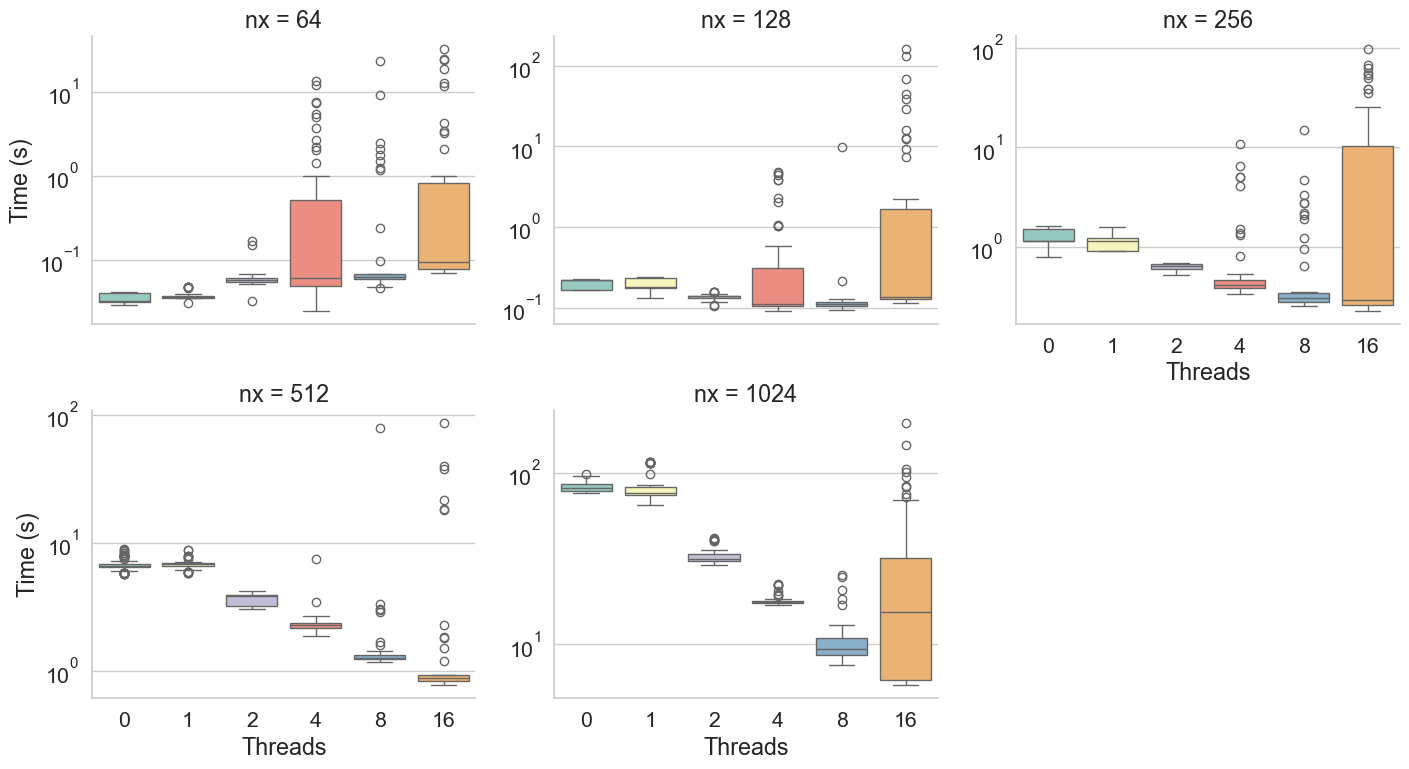

In [7]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)


# Create FacetGrid for each 'nx' value
g = sns.FacetGrid(df_complete, col="nx", col_wrap=3, height=4, aspect=1.2, sharey=False)
g.map_dataframe(sns.boxplot, x="threads", y="timespent", palette="Set3")
g.set(yscale="log")
# g.add_legend(title="threads", loc="lower right")
# Set titles and labels
g.set_axis_labels("Threads", "Time (s)")

g.set_titles("nx = {col_name}")

plt.tight_layout()
plt.show()


In [8]:
g.savefig("data_var.pdf")